## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Homework 7: due March 2, 2018

Please enter all answers within this notebook unless otherwise specified. As usual, don't forget to cite sources and collaborators.

Through this problem set, use the SageMath 8.1 kernel except as specified. You may find the following declarations useful:
```
preparser(False)                    # Turn off Sage preparser
import pandas as pd                 # Load pandas
import numpy as np                  # Load numpy
import matplotlib                   # Load matplotlib
import matplotlib.pyplot as plt     # Load pyplot
matplotlib.style.use('ggplot')      # Use R-style plotting in matplotlib
import seaborn as sns               # Load seaborn
```

This homework consists of 5 problems, each of equal value.

### Problem 1: Emulation of R in Python

Grading criteria: correctness of code.

Demonstrate Python analogues of the following R code blocks from the previous homework. Hints:
- The Python `statsmodels` module includes the submodule `datasets` which simulates the corresponding R package.
- The R `pairs` function can be simulated using the pandas function `scatter_matrix`.
- The seaborn function `FacetGrid` allows you to set up a grid in which each entry corresponds to a particular value of a conditioning variable. Use this, and the matplotlib scatter plot functionality, to simulate the R function `coplot`.
- The statsmodels module `mosaicplot` can simulate the R function `mosaicplot`.

In [13]:
from statsmodels import datasets
%load_ext rpy2.ipython

In [0]:
%%R
pairs(mtcars)

In [1]:
# Your Python equivalent goes here.  Warning: this dataset is not available via statsmodels, and the FacetGrid function may crash the kernel.

In [0]:
%%R
require(stats); require(graphics)
coplot(circumference ~ age | Tree, data = Orange, show.given = FALSE)

In [12]:
# Your Python equivalent goes here.

In [0]:
%%R
x <- apply(HairEyeColor, c(1, 2), sum)
x
mosaicplot(x)

In [20]:
df = datasets.get_rdataset("HairEyeColor")

IndexError: tuple index out of range

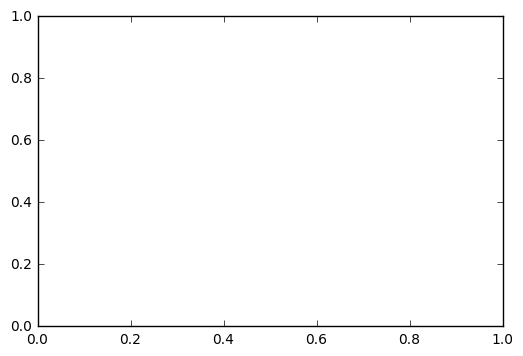

In [28]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df,[1,2])

In [19]:
from rpy2.robjects import r, pandas2ri

In [0]:
pandas2ri.ri2py(....)

In [0]:
# Your Python equivalent goes here

### Problem 2: Sunspots revisited

Grading criteria: correctness of code and results.

Let `sunspots` be the sunactivity dataframe (defined below for you).

In [0]:
from statsmodels import datasets
sunspots = datasets.sunspots.load_pandas().data.set_index("YEAR")

In [30]:
from statsmodels import datasets
sunspots = datasets.sunspots.load_pandas().data.set_index("YEAR")

KeyError: 1.0

2a. For how many years was the activity $\geq 100$?

2b. Make a histogram plot of all activity from 1900 to the end of the dataset.

In [33]:
sunspots[1900:]

,SUNACTIVITY
YEAR,
1900.0,9.5
1901.0,2.7
1902.0,5.0
1903.0,24.4
1904.0,42.0
1905.0,63.5
1906.0,53.8
1907.0,62.0
1908.0,48.5


2c. Which year(s) had the highest activity?

### Problem 3: Pivot tables

Grading criteria: correctness of code and explanations.

3a. Load the "mpg" R dataset from the Python ggplot library into the variable `mpg`.

In [3]:
from ggplot import mpg
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


3b. Using the pandas `pivot_table` command, cretae a pandas DataFrame that tells you the average "cty" and "hwy" (city and highway miles per gallon) for each manufacturer.

3c. Has the average city mileage improved from 1999 to 2008?   Has the average highway mileage improved from 1999 to 2008?

3d. Create a scatterplot of pairs (displ, hwy) for all cars in 1999, and another for all cars in 2008.

3e. What effect does increasing displacement have on highway gas mileage?

### Problem 4: Irises

Grading criteria: correctness of code and explanations.

The [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a famous example used in statistics education.

4a. Load the iris dataset into a pandas DataFrame and use the `describe` command to see some basic statistics.

In [34]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset('iris').data
iris


/ext/sage/sage-8.1/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


4b. Plot all of the sepal (length, width) pairs in a scatterplot, and the petal (length, width) pairs in another scatterplot.

In [36]:
import matplotlib.pyplot as plt
#x_data = iris.iloc[:,0]
#x_data
y_data = iris['Sepal.Width']
y_data
#plt.scatter(x_data, y_data)

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal.Width, Length: 150, dtype: float64

4c. Compute the average petal width for each of the "species"-categories.

### Problem 5: Machine learning with irises

Grading criteria: correctness and relevance of code.

5a. The Wikipedia article on the iris dataset asserts:
> The use of this data set in cluster analysis however is not common, since the data set only contains two clusters with rather obvious separation.

Demonstrate this by performing a clustering computation and showing that it fails to separate the three species.

5b. Use the [scikit-learn SVM classifier](http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation) to classify species. Use a random sample of 80% of the initial data for training and the other 20% for testing, and report the accuracy rate of your predictions.

In [37]:
from rpy2.robjects import r, pandas2ri
import pandas as pd
import matplotlib.pyplot as plt
pandas2ri.activate()
iris = pd.DataFrame(r['iris'])

In [43]:
iris.axes()

AttributeError: 'DataFrame' object has no attribute 'labels'

In [41]:
from sklearn import svm
from sklearn.utils import shuffle
import statsmodels.formula.api as sm
iris = shuffle(iris)
clf = svm.SVC(gamma=0.001, C=100.)
train = iris.sample(frac=0.8)
test = iris.loc[~iris.index.isin(train.index)]
clf.fit(train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],train['Species'])
predictions = clf.predict(test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])
predictions
model = sm.ols(formula='Species ~ Sepal, Petal', data=train)
fitted = model.fit()
fitted.summary()

NameError: name 'Sepal' is not defined

In [0]:
sm.ols?